### Topic Modeling using LDA with Gensim

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [73]:
# getting the data

data = pd.read_csv("./Data/data_reviews.csv")

data.head()

,institute_name,review,rating
0,A1 Global Institute of Engineering and Technol...,\nThe college is situated at a very good locat...,3.0
1,"AAA College of Engineering and Technology, Thi...",\nI would love to share my experience here. As...,5.0
2,"AAA College of Engineering and Technology, Thi...",\nteaching is well and good\nrelation between ...,5.0
3,"AAA College of Engineering and Technology, Thi...","\n* Placements are good for CS, ECE and IS\n* ...",5.0
4,"AAA College of Engineering and Technology, Thi...",\nNitte is a very good college located in Sout...,3.0


In [74]:
data.isna().sum()

institute_name    0
review            0
rating            0
dtype: int64

In [75]:
data.shape

(38679, 3)

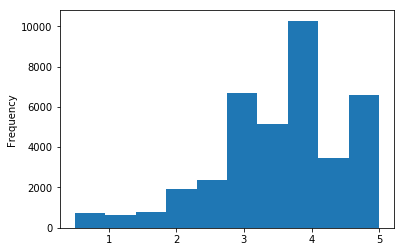

In [76]:
data['rating'].plot.hist()
plt.show()

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38679 entries, 0 to 38678
Data columns (total 3 columns):
institute_name    38679 non-null object
review            38679 non-null object
rating            38679 non-null float64
dtypes: float64(1), object(2)
memory usage: 906.6+ KB


In [78]:
THRESHOLD = 4

good_review_data = data[data['rating'] >= THRESHOLD]['review'].values # only store the text
bad_review_data = data[data['rating'] < THRESHOLD]['review'].values # only store the text

In [79]:
good_review_data.shape,bad_review_data.shape

((20273,), (18406,))

In [80]:
good_review_data[0],bad_review_data[0]

('\nI would love to share my experience here. As a fresher just out of my 12th and from a small town, I was looking for an engineering college where I can explore myself. I was looking for a platform where I can learn and grow. My search for the right institute ended with NMIT. It was the right place for me not only to learn but also to explore different avenues. I would rather say it was a launch pad for me where I can spread my wings and I had the support of my faculty and seniors to guide me well where I go wrong.\nThe most beautiful part is the campus. Though, a little remote for the daily commuters, the calmness and serenity of the campus, away from the chaos of the city adjusts and levels the score.\nFor someone worrying about the placements, I would like to share to say that you need to learn and explore, participate in different cultural and extracurricular activities in the campus and the rest is assured.\n\n',
 '\nThe college is situated at a very good location and the enviro

In [81]:
# nlp

import spacy
import nltk
from bs4 import BeautifulSoup
from sklearn.feature_extraction import stop_words
from spacy.lemmatizer import Lemmatizer
from spacy.tokenizer import Tokenizer
from spacy.lookups import Lookups
from nltk.tokenize import word_tokenize


lemmatizer = Lemmatizer(Lookups())

nlp = spacy.load("en_core_web_sm")

stop_words_sklearn = list(stop_words.ENGLISH_STOP_WORDS)
stop_words_spacy = list(nlp.Defaults.stop_words)

stop_words = list(set(stop_words_sklearn + stop_words_spacy)) # all the stop words

In [82]:
len(stop_words_sklearn),len(stop_words_spacy)

(318, 326)

In [83]:
stop_words[1:10]

['above', 'have', 'anyhow', 'did', 'whatever', '’re', 'nine', 'whose', 'eg']

In [84]:
word_tokenize("This is a sentence")

['This', 'is', 'a', 'sentence']

In [85]:
# pre-process pipeline

def remove_extra_spaces(review):
    return review.strip()


def remove_html_content(review):
    """
    remove html content if any using bs4
    """
    return BeautifulSoup(review).get_text()

def tokenization(review):
    return word_tokenize(review)
    

def remove_stop_words(review):
    return [word for word in review if not word in stop_words]
    
    
def lemmatization(review):
    return [lemmatizer.lookup(word) for word in review] 


def transform(reviews):
    """
    the transform fn that will apply all the transforms
    """
    transformed_reviews = []
    
    for review in tqdm(reviews,total = reviews.shape[0]):
        if len(review) != 0:
            review  = review.lower()
            review = remove_extra_spaces(review)
            review = remove_html_content(review)
            review_tok = tokenization(review)
            review = remove_stop_words(review_tok)
            review_lem = lemmatization(review)
            
            transformed_reviews.append(" ".join(review_lem))
            
    return np.array(transformed_reviews)       

In [86]:
sample = good_review_data[:2]

sample

array(['\nI would love to share my experience here. As a fresher just out of my 12th and from a small town, I was looking for an engineering college where I can explore myself. I was looking for a platform where I can learn and grow. My search for the right institute ended with NMIT. It was the right place for me not only to learn but also to explore different avenues. I would rather say it was a launch pad for me where I can spread my wings and I had the support of my faculty and seniors to guide me well where I go wrong.\nThe most beautiful part is the campus. Though, a little remote for the daily commuters, the calmness and serenity of the campus, away from the chaos of the city adjusts and levels the score.\nFor someone worrying about the placements, I would like to share to say that you need to learn and explore, participate in different cultural and extracurricular activities in the campus and the rest is assured.\n\n',
       "\nteaching is well and good\nrelation between teache

In [87]:
sample_trasformed = transform(sample)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 499.89it/s]


In [88]:
sample_trasformed

array(['love share experience . fresher 12th small town , looking engineering college explore . looking platform learn grow . search right institute ended nmit . right place learn explore different avenues . launch pad spread wings support faculty seniors guide wrong . beautiful campus . , little remote daily commuters , calmness serenity campus , away chaos city adjusts levels score . worrying placements , like share need learn explore , participate different cultural extracurricular activities campus rest assured .',
       'teaching good relation teacher student friendly monthly industrial visit experience students college campus good ... ... ... ... ... ... ... good faculty ... ... ... . . ... ... ... ... ... ... ... .. . . . .'],
      dtype='<U514')

In [89]:
good_reviews_transformed = transform(good_review_data)
bad_reviews_transformed = transform(bad_review_data)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 18406/18406 [00:18<00:00, 1005.13it/s]


In [94]:
# reviews_transformed.shape

In [95]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
good_vectorizer = TfidfVectorizer(stop_words = "english")
bad_vectorizer = TfidfVectorizer(stop_words = "english")

good_vectors = good_vectorizer.fit_transform(good_reviews_transformed).todense()
bad_vectors = bad_vectorizer.fit_transform(bad_reviews_transformed).todense()

In [97]:
good_vectors.shape,bad_vectors.shape

((20273, 23407), (18406, 20631))

In [98]:
# use SVD of sklearn

from sklearn.decomposition import TruncatedSVD

In [99]:
svd_good = TruncatedSVD(n_components = 100)

svd_bad = TruncatedSVD(n_components = 100)

In [100]:
svd_good.fit(good_vectors)
svd_bad.fit(bad_vectors)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
             random_state=None, tol=0.0)

In [102]:
good_vocab = np.array(good_vectorizer.get_feature_names())
bad_vocab = np.array(bad_vectorizer.get_feature_names())

num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [103]:
show_topics(svd_good.components_)

['brutally dwarka okok becoause fargi astudent delusional granary',
 'duniya duniyadaari interview cho convert gold enjoymentand olympus',
 'becoause anual ibm ppo rapport rates prety 858',
 'dwarka kannur delegation essence becoause ibm palcement fargi',
 'ea busy phds plenty celebrity 5mbps mistakes mugger',
 'brutally anual civ nonfiction kalan doint astudent handwork',
 'brutally conversion delaying lax insfrastructure installation disturbunce billiard',
 'drowsy lay okok conversion delegation bses civ essence',
 'bses astudent lec mamallapuram intellectual ntu josh genba',
 'competitve jm inhence competion individial clash broadening leaening',
 'brutally misguided alumina choclates deducts okok abandoned rapport',
 'economist okok delegation dispite ksvu allover lacper empanicated',
 'ppo economist granary dealing gulab peace displane rapport',
 'ppo delegation brutally astudent economist misguided alumina deducts',
 'delegation indori gradully befor essence granary antakshary gu

In [104]:
show_topics(svd_bad.components_)

['bequeaths deeper majority edc consult ica fantestic atws',
 'deeper edc displays grand consternate fancied auk constituency',
 'bequeaths fantestic condion ifos neighbourhood 95 comapines map',
 '40lacs mega manzar imax easier addiction monirba majority',
 'majority oppertunities algar iiit bequeaths ica aiesec 40lacs',
 '570 consternate longs majority compines methodologies bullies bequeaths',
 'conflictions methodologies east andnom benefit 40lacs berkley bidadi',
 'benefit majored iiit andnom 570 expand east ica',
 'fantestic methodologies farmers bidadi expouser mist atws icar',
 'narain consult expand iiit mookkannoor hardest brahm ganguly',
 'average meh grand consternate ahmednagar carreer fantestic broadly',
 'displays constituency anchorages 40lacs atws aiesec iiit fancied',
 'narain majored methodologies constituency benefit majority grand bidadi',
 'narain algar icar aiesec delve conflictions oppertunities heartbeat',
 'grand majority anchorages consult icar andnom aiesec 